# Smoothing splines in R


In this video, we will learn how to fit smoothing splines in R. In particular, we will simulate data, and learn to fit smoothing splines in R by fixing a spar/$\lambda$ value, and by computing a cross validation estimate of spar/$\lambda$.

Let's start with a simulation. We'll create a data frame, with a predictor, $x$, as realizations from a $U(0,\pi/2)$, and let $Y = \sin(\pi x) + \varepsilon$, where $\varepsilon \overset{iid}{\sim} N(0,0.5^2)$.

In [8]:
set.seed(88888)

n = 150
x = runif(n, 0, pi/2) 
y = sin(pi*x) + rnorm(n, 0, 0.5) + 4

df = data.frame(x = x, y = y)
head(df)

x,y
0.3760199,5.763870
0.9016790,4.300436
1.2164907,3.843510
1.3107582,2.465646
0.4385922,5.737440
1.0267308,4.600813


The function `smooth.spline()` can easily compute a smoothing spline estimate, $\widehat f(x)$, of the true function $f(x) = \sin(\pi x)$. We'll specify the `x` and `y` coordinates, and the `spar`. Recall again that `spar` is monotone function of the smoothing parameter $\lambda$. Experimenting with different values of `spar` can help find a suitable smooth. Also, by leaving `spar` unspecified, R will choose a smoothing parameter value using a cross validation procedure.

For visualization purposes, we'll make a scatter plot of the data, and overlay the smoothing spline using the `lines()` function. We'll do this with a low value and a high value for spar/$\lambda$, along with an automatically chosen spar/$\lambda$.

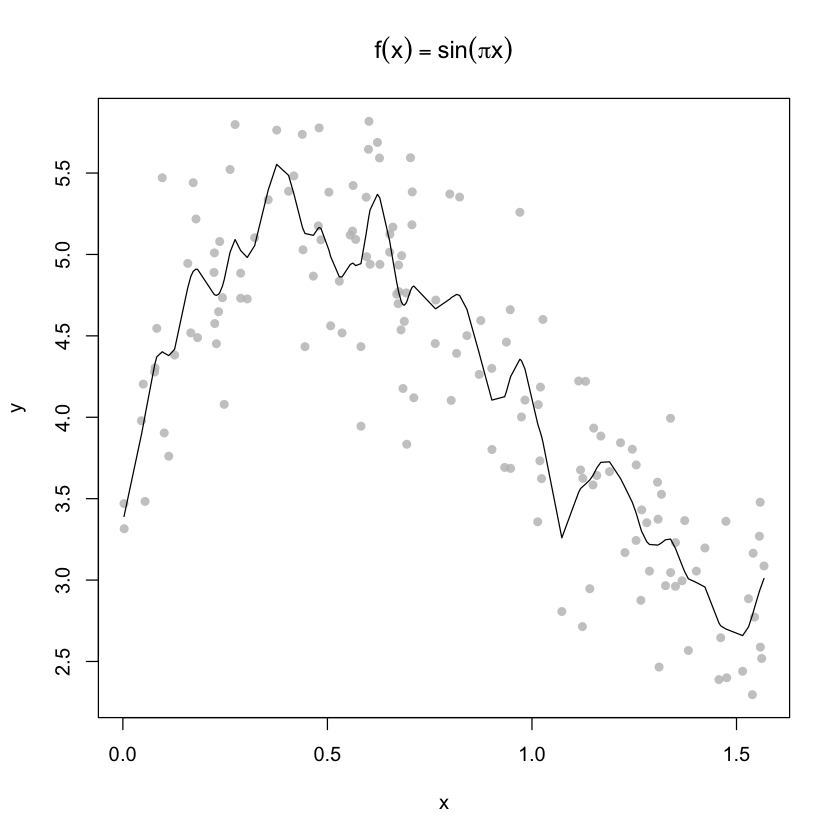

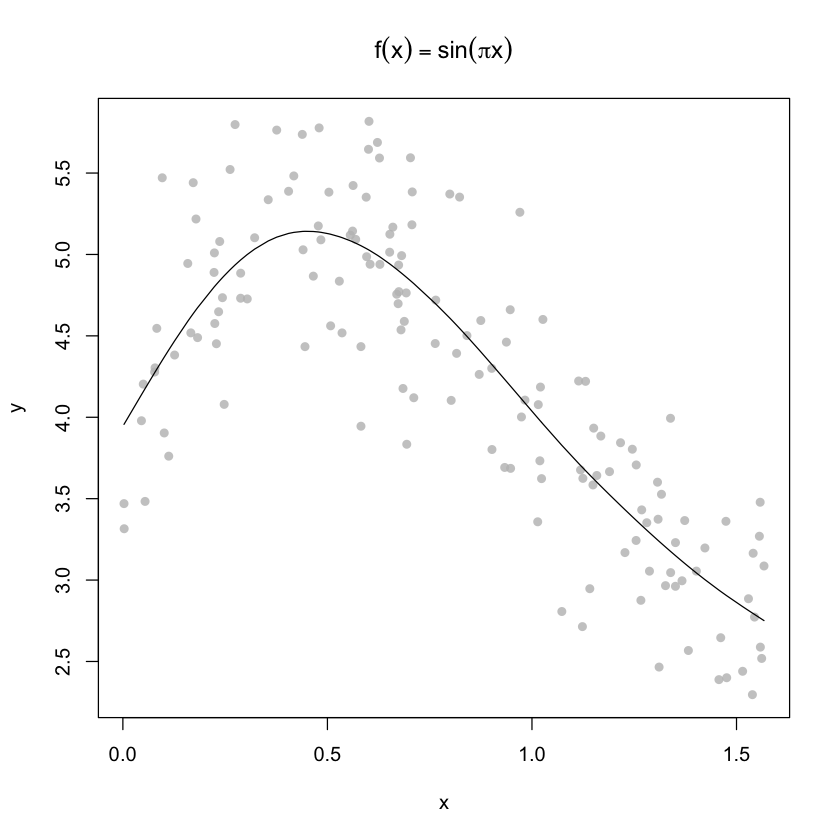

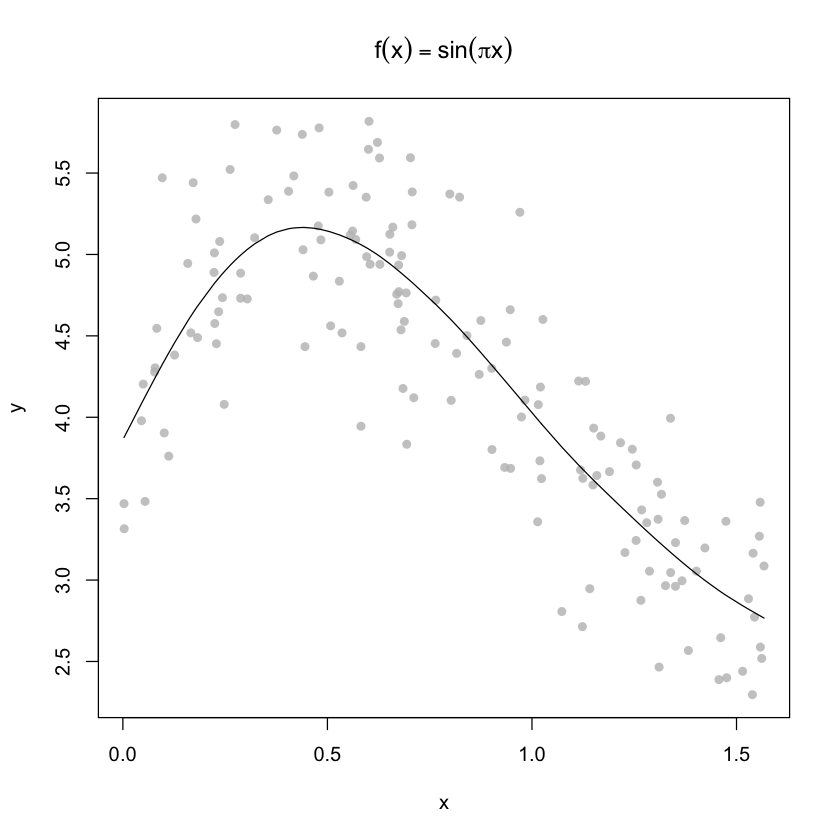

In [34]:
library(ggplot2)
plot(y ~ x, main = expression(f(x) == sin(pi*x)), pch = 16, col = alpha("grey", 0.8))
lines(smooth.spline(x, y, spar = 0.5))

plot(y ~ x, main = expression(f(x) == sin(pi*x)), pch = 16, col = alpha("grey", 0.8))
lines(smooth.spline(x,y, spar = 1))

plot(y ~ x, main = expression(f(x) == sin(pi*x)), pch = 16, col = alpha("grey", 0.8))
lines(smooth.spline(x,y))

Note that the first fit appears to be too rough, which indicates that $\lambda$ is too small. The second fit appears to be much better, capturing trends without modeling noise in the data. The last fit, which automatically chooses $\lambda$ based on a cross validation procedure. One variant of cross validation is as follows. 

Choose a grid of $\lambda$ values (or, since the `smooth.spline()` function is in terms of `spar`, below we'll choose a grid of spar values). For each spar/$\lambda_j$:

1. For $i=1,..,n$, split the data into a training set of all data points *except* the $i^{th}$ point. The $i^{th}$ point serves as the testing set, on which we'll calculate the cross validation error.

2. Fit the smoothing spline model on the training set. For $i=1,..,n$ compute $\big( y_i - \widehat f_{\lambda_j(i)}(x_i) \big)^2$, where $\widehat f_{\lambda_j(i)}(\cdot)$ is the predicted smooth fit on the training set (the notation $(i)$ suggests that we are leaving the $i^{th}$ point out of the fit), using $\lambda_j$ (or corresponding spar value).  Note that the pair $(x_i, y_i)$ is the point that was *left out* of the training set, i.e., it is our test set.

3. For each spar/$\lambda_j$, compute
\begin{align}
CV(\lambda_j) = \frac{1}{n} \sum^n_{i=1}\big(y_i - \widehat f_{\lambda_j(i)}(x_i) \big)^2.
\end{align}

4. Choose the value of $\lambda$ that with the smallest $CV(\lambda)$.

Let's implement this procedure in R.

In [29]:
spar_seq = seq(from=0.05,to=1, by=0.05) # grid of spar values
CV_err_spar = rep(NA,length(spar_seq)) 

for(j in 1:length(spar_seq)){
    spar_using = spar_seq[j] 
    CV_err = rep(NA, n) #recall that n is the sample size, as defined above
    for(i in 1:n){
        x_test = x[i] #leave one x value out for CV
        y_test = y[i] #leave one y value out for CV

        x_tr = x[-i] #make the remaining x values the x values for the training set
        y_tr = y[-i] #make the remaining y values the y values for the training set
     
    y_test_predict = predict(smooth.spline(x = x_tr,y = y_tr, spar = spar_using), x_test) #predicted value in test set
    CV_err[i] = (y_test - y_test_predict$y)^2 # squared error
    }
    
CV_err_spar[j] = mean(CV_err) #CV: mean of the squared errors
    
}

s = spar_seq[which.min(CV_err_spar)] #the "best" spar value, as measured by leave-one-out CV

cat("The cross validation procedure chooses spar = ", s, ".")

The cross validation procedure chooses spar =  0.95 .

We can plot the "leave one out cross validation error" $CV(spar)$ as a function of spar to visualize the minimum.

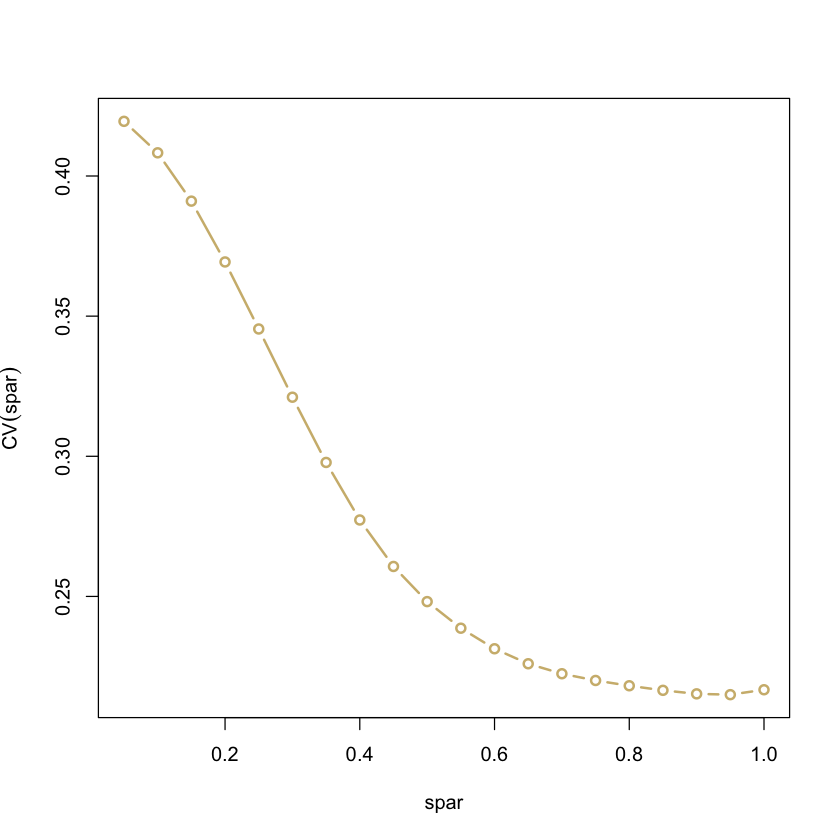

In [33]:
 plot(x=spar_seq, y=CV_err_spar, type="b", lwd=2, col="#CFB87C", 
      xlab="spar", ylab= expression(CV(spar)))

And, we can plot the simulated data and fitted smoothing spline fit using the spar of 0.95...

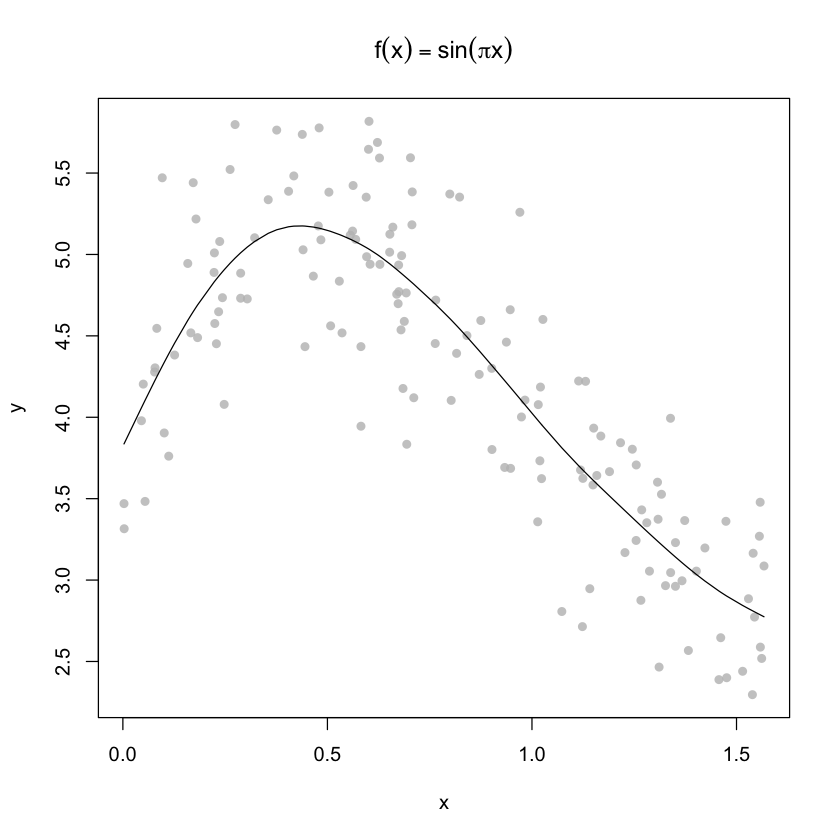

In [25]:
plot(y ~ x, main = expression(f(x) == sin(pi*x)), pch = 16, col = alpha("grey", 0.8))
lines(smooth.spline(x,y, spar = s))